In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [5]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")

In [20]:
# method - ucb

N , d , tr = 1000 , 10 , 0
sel_ads = []
no_of_sel , sum_rew = [0]*d , [0]*d

for n in range (0,N):
    ad , max_ub = 0 , 0
    for i in range(0,d):
        if no_of_sel[i]>0 :
            avg_rew = sum_rew[i]/no_of_sel[i]
            di = math.sqrt(3/2 * math.log(n+1)/no_of_sel[i])
            ub = avg_rew + di
        else: 
            ub =1e400
        if ub>max_ub :
            max_ub , ad = ub , i
            
    sel_ads.append(ad)
    no_of_sel[ad] += 1
    rew = df.values[n,ad]
    sum_rew[ad] += rew 
    tr += rew

(array([109.,  79.,  53.,  68., 287.,  53.,  86., 140.,  64.,  61.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

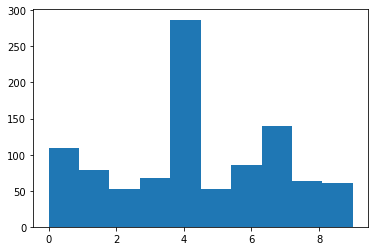

In [21]:
# method - ucb

plt.hist(sel_ads)

In [22]:
#method  - thompson sampling

import random 

N , d , tr = 1000 , 10 , 0
sel_ads = []
no_of_rew_1 , no_of_rew_2 = [0]*d, [0]*d

for n in range (0,N):
    ad , max_rn = 0 , 0
    for i in range(0,d):
        rn_beta = random.betavariate(no_of_rew_1[i] +1 , no_of_rew_2[i] +1)
        
        if rn_beta > max_rn:
            max_rn, ad= rn_beta,i
    
    sel_ads.append(ad)
    rew = df.values[n,ad]
    
    if rew==1:
        no_of_rew_1[ad]+= no_of_rew_1[ad]+1
        
    else:
        no_of_rew_2[ad]+= no_of_rew_2[ad]+1
    tr+=rew

(array([ 98.,  99.,  77., 117., 138.,  73., 100., 126.,  94.,  78.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

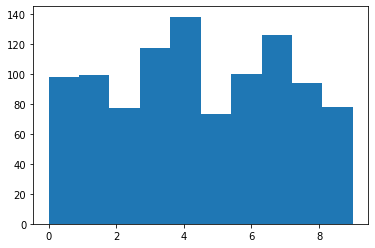

In [23]:
#method  - thompson sampling

plt.hist(sel_ads)